<a href="https://colab.research.google.com/github/BlackHole3344/Deep-learning/blob/main/LENET.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import tensorflow as tf
from tensorflow.keras import models , layers

In [ ]:
import matplotlib.pyplot as plt
import numpy as np
import time

In [ ]:
print(tf.test.is_built_with_cuda())


True


In [ ]:
(x_train  , y_train ) , (x_test , y_test ) = tf.keras.datasets.mnist.load_data()


11490434/11490434 [==============================] - 0s 0us/step


In [ ]:
x_train[8]

array([[  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0],
       [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0],
       [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0],
       [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0],
       [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0],
       [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   5,
         63, 197,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0],
       [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,  20,
        254, 230,  24,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0],
       [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,  20,
        254, 254,  48,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0],
       [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,  20,
        254, 255,  48,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0],
       [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,  20,
        254, 254,  57,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0],
       [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,  20,
        254, 254, 108,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0],
       [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,  16,
        239, 254, 143,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0],
       [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
        178, 254, 143,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0],
       [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
        178, 254, 143,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0],
       [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
        178, 254, 162,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0],
       [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
        178, 254, 240,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0],
       [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
        113, 254, 240,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0],
       [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
         83, 254, 245,  31,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0],
       [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
         79, 254, 246,  38,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0],
       [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0, 214, 254, 150,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0],
       [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0, 144, 241,   8,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0],
       [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0, 144, 240,   2,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0],
       [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0, 144, 254,  82,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0],
       [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0, 230, 247,  40,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0],
       [  0,   0,   0,   0,   0,   0,   

In [ ]:
x_train.shape

(60000, 28, 28)

In [ ]:
x_train , x_test = x_train / 255 , x_test / 255

In [ ]:
x_train[8]

array([[0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        ],
       [0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        ],
       [0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.    

In [ ]:
x_train = x_train.reshape(-1 , 28 , 28 , 1)
x_test = x_test.reshape(-1 , 28 ,28 ,1 )

In [ ]:
x_train.shape , x_train.ndim

((60000, 28, 28, 1), 4)

In [ ]:
# applying pading
def pad_image(image , new_height , new_width):
  paded_image = tf.image.pad_to_bounding_box(image , 0 , 0 , new_height , new_width)

  return paded_image

In [ ]:
x_train = pad_image(x_train , 32 , 32 )
x_test = pad_image(x_test , 32 , 32)

In [ ]:
x_train.shape

TensorShape([60000, 32, 32, 1])

In [ ]:
model = tf.keras.models.Sequential([
    layers.Conv2D(6 , (5,5) , activation = "relu" , input_shape = [32 , 32 , 1 ]) ,
    layers.AveragePooling2D(pool_size = (2,2) , strides = 2  ) ,
    layers.Conv2D(16 , (5,5) , activation = "relu" ) ,
    layers.AveragePooling2D(pool_size = (2,2) , strides = 2 ) ,
    layers.Conv2D(120 , (5,5) , activation = "relu") ,
    layers.Dense(84 , activation = "relu") ,
    layers.Dense(10 , activation = "softmax") ,
])

In [ ]:
model.compile(optimizer='adam',
              loss='sparse_categorical_crossentropy',
              metrics=['accuracy'])

In [ ]:
model.fit(x_train , y_train ,epochs = 10)

Epoch 1/10
1875/1875 [==============================] - 52s 25ms/step - loss: 0.2130 - accuracy: 0.1257
Epoch 2/10
1875/1875 [==============================] - 57s 30ms/step - loss: 0.0686 - accuracy: 0.1280
Epoch 3/10
1875/1875 [==============================] - 54s 29ms/step - loss: 0.0493 - accuracy: 0.1280
Epoch 4/10
1875/1875 [==============================] - 43s 23ms/step - loss: 0.0390 - accuracy: 0.1284
Epoch 5/10
1875/1875 [==============================] - 38s 20ms/step - loss: 0.0306 - accuracy: 0.1281
Epoch 6/10
1875/1875 [==============================] - 39s 21ms/step - loss: 0.0262 - accuracy: 0.1275
Epoch 7/10
1875/1875 [==============================] - 38s 20ms/step - loss: 0.0225 - accuracy: 0.1286
Epoch 8/10
1875/1875 [==============================] - 39s 21ms/step - loss: 0.0182 - accuracy: 0.1280
Epoch 9/10
1875/1875 [==============================] - 38s 20ms/step - loss: 0.0175 - accuracy: 0.1282
Epoch 10/10
1875/1875 [==============================] - 38s 20m

In [ ]:
test_loss , test_accuracy = model.evaluate(x_test , y_test)
test_loss , test_accuracy

313/313 [==============================] - 3s 8ms/step - loss: 0.0322 - accuracy: 0.1228


(0.03216562047600746, 0.12284202128648758)

In [ ]:
print(test_accuracy * 100)

12.284202128648758


In [ ]:
prediction = model.predict(x_test)
predicted_labels = tf.math.argmax(prediction)

313/313 [==============================] - 5s 16ms/step


In [ ]:
predicted_labels.shape

TensorShape([1, 1, 10])

In [ ]:
prediction[0]

(array([[[3.4783950e-14, 1.3453252e-09, 3.6157935e-10, 9.1387502e-09,
          9.9271880e-10, 5.8134369e-11, 1.5767706e-16, 9.9999994e-01,
          9.7978526e-12, 2.2536113e-08]]], dtype=float32),
 7)

In [ ]:
x_test[0] , y_test[0]

(<tf.Tensor: shape=(32, 32, 1), dtype=float64, numpy=
 array([[[0.],
         [0.],
         [0.],
         ...,
         [0.],
         [0.],
         [0.]],
 
        [[0.],
         [0.],
         [0.],
         ...,
         [0.],
         [0.],
         [0.]],
 
        [[0.],
         [0.],
         [0.],
         ...,
         [0.],
         [0.],
         [0.]],
 
        ...,
 
        [[0.],
         [0.],
         [0.],
         ...,
         [0.],
         [0.],
         [0.]],
 
        [[0.],
         [0.],
         [0.],
         ...,
         [0.],
         [0.],
         [0.]],
 
        [[0.],
         [0.],
         [0.],
         ...,
         [0.],
         [0.],
         [0.]]])>,
 7)

In [ ]:
x_test2 = tf.identity(x_test)

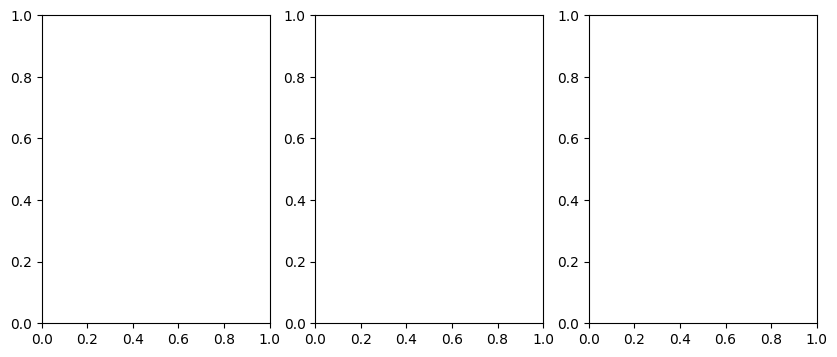

In [ ]:
fig , axs = plt.subplots(1 , 3 , figsize = (10 , 4 ))

In [ ]:
axs[0] = plt.imshow()